In [98]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2394,ham,I don't run away frm u... I walk slowly &amp; ...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
4830,ham,Po de :-):):-):-):-). No need job aha.,NaN,NaN,NaN
5531,ham,Compliments to you. Was away from the system. ...,NaN,NaN,NaN
1691,ham,I don't know but I'm raping dudes at poker,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing like vectorizing and stemming
#4. MOdel building
#5. Evaluation
#6. Improvements
#7. Website
#8. Deploy

## 1. Data Cleaning

In [6]:
#First check the columns unnamed 2, 3, 4 are of any use or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
#inplace=True is for the data frame has to make changes permanent

In [8]:
df.sample(5)

,v1,v2
1220,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
5385,ham,How do friends help us in problems? They give ...
279,ham,All done? All handed in? Celebrations in full ...
1040,ham,Today am going to college so am not able to at...
486,spam,FREE MESSAGE Activate your 500 FREE Text Messa...


In [1]:
#renaming the cols
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)

NameError: name 'df' is not defined

In [10]:
df.sample(5)

,target,text
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
4308,ham,He dint tell anything. He is angry on me that ...
1624,spam,500 free text msgs. Just text ok to 80488 and ...
4430,ham,2mro i am not coming to gym machan. Goodnight.
2005,ham,Can't take any major roles in community outrea...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
#Encode target labels with value between 0 and n_classes-1
#ham or spam to 0 and 1

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()
#It will return the count of null values in each column

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicated values
#first : Drop duplicates except for the first occurrence.
df = df.drop_duplicates(keep = 'first')

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
#exploratory data analysis
# to get the basic understanding about the data we perform EDA

In [19]:
#first ques: what percentage of SMS is spam and ham?
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
#no of hams = 4516
# no of spams = 653

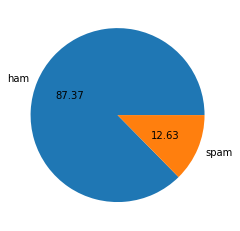

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
#autopct enables you to display the percent value using Python string formatting.
plt.show()

In [23]:
# around 88% of the SMS are ham and only around 12% of SMS are spam
#data is imbalanced

In [24]:
#another analysis is how many alphabetets, words and sentences are used in the SMS


In [25]:
import nltk

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
#Punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences

In [29]:
#for deeper analysis, we are going to create 3 cols
#1st for no of alphabets in SMS, no of words and the last for no of sentence 

In [30]:
df['num_characters'] = df['text'].apply(len)

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [33]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
#description of the columns like max words, or avg words for both ham and spam
df[['num_characters' , 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#ham
df[df['target'] == 0][['num_characters' , 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#sham
df[df['target'] == 1][['num_characters' , 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
#we got a basic idea about the difference between ham and spam messages
#we can see that generally, the spam messages are longer than ham messages

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

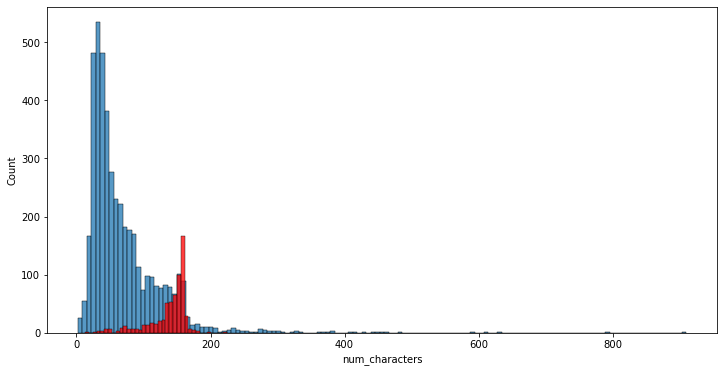

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

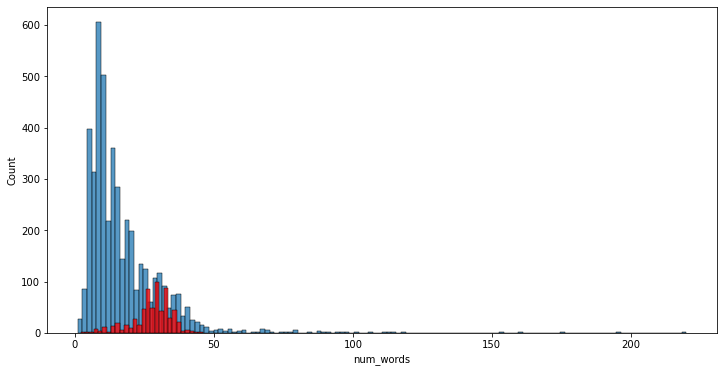

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

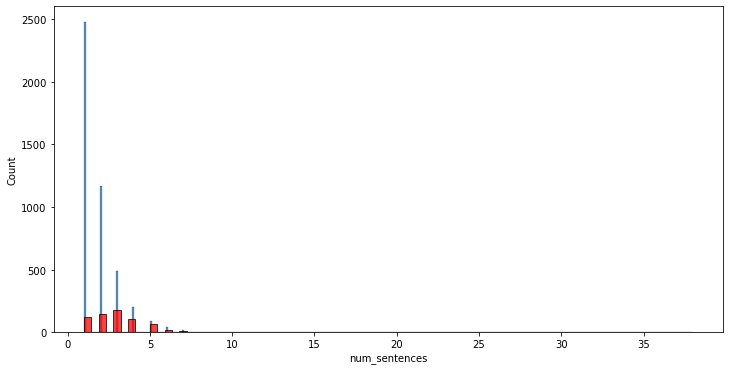

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

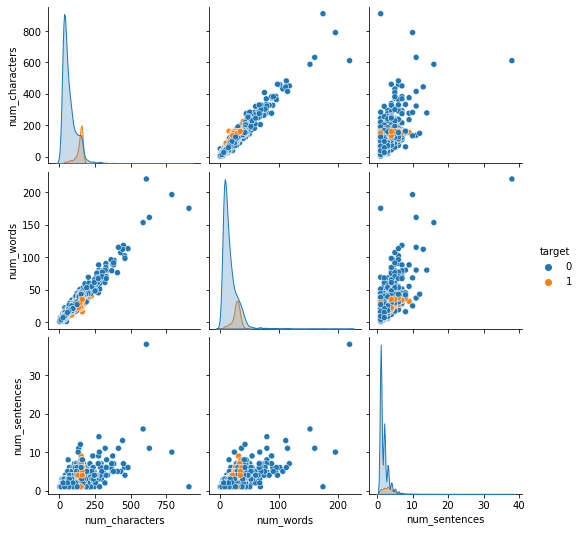

In [45]:
#relationship between columns
sns.pairplot(df, hue='target')

<AxesSubplot:>

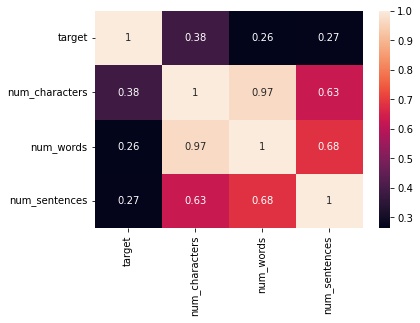

In [46]:
#correlation between cols
sns.heatmap(df.corr(), annot=True)

In [47]:
#from the above plot we can see that the num_characters attribute has the strongest correlation with target.
#hence we will keep this attribute only and remove others as there is very strong correlation between the attributes


## 3. Data Preprocessing
         Lower case
         Tokenization
         Removing special characters
         Removing stop words and punctuation
         Stemming

In [48]:
#stopwords are those words which donot play any role in determining the meaning of the sentence

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')
# Stemmers remove morphological affixes from words, leaving only the word stem

import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:] #cloning y into text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [50]:
#example
transform_text("I loved the youtube lectures on Machine Learning. How about you?")

'love youtub lectur machin learn'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
#creating word cloud
#tells us which words are prominent in hams and which words are prominent in spam

In [54]:
!pip install wordcloud

In [55]:
from wordcloud import WordCloud #Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

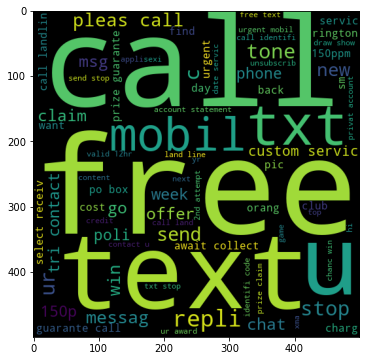

In [57]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

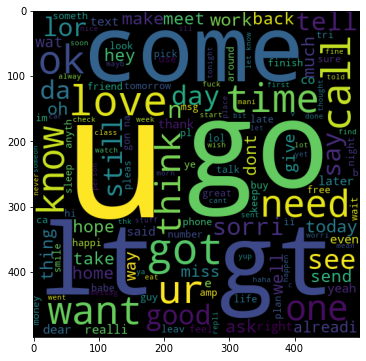

In [59]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [60]:
#30 most used words in ham and spam
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


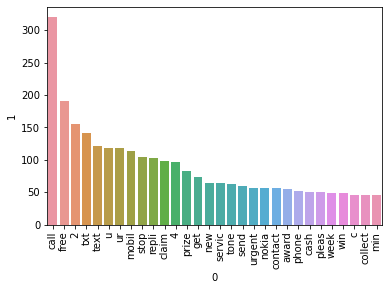

In [63]:
from collections import Counter #A Counter is a subclass of dict. Therefore it is an unordered collection where elements and their respective count are stored as a dictionary
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35402

C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


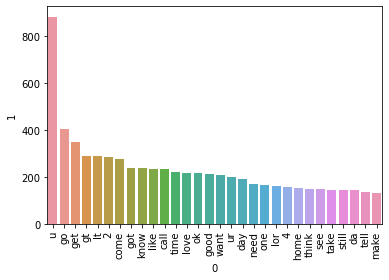

In [66]:
from collections import Counter #A Counter is a subclass of dict. Therefore it is an unordered collection where elements and their respective count are stored as a dictionary
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [67]:
#Naive Bayes Model: the performance of this model on textual data is best

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
#any ML algo needs numerical inputs
#The input is in textual form and the target is in numerical form
#Hence we need to convert or vecotorize our input from textual to numerical form

In [234]:
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [190]:
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [191]:
X1.shape

(5169, 6708)

In [235]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [236]:
from sklearn.model_selection import train_test_split

In [194]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 2)

In [195]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [196]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [197]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [198]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [237]:
#testing with Tfidf: This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [201]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [239]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
#the model is not giving any false positive
#not returning a single SMS which was not spam and it labeled it as spam

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [203]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [204]:
# tfidf --> MNB

In [205]:
#checking other models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [206]:
#creating objects of each model
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [207]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [208]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [209]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [210]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items(): #Return the dictionary's key-value pairs
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For  NB
Accuracy:  0.9709864603481625
Precision:  1.0
For  DT
Accuracy:  0.9294003868471954
Precision:  0.8282828282828283
For  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For  AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For  xgb
Accuracy:  0.9671179883945842
Precision:  0.9333333333333333


In [184]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision' , ascending=False)

In [185]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [186]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [187]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


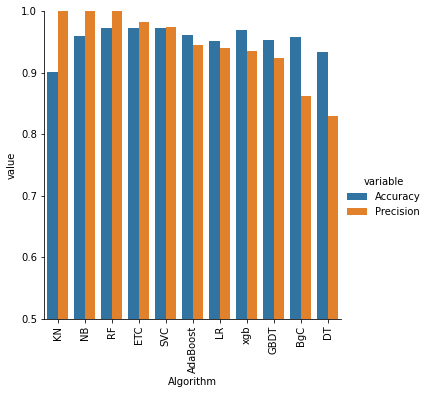

In [188]:
sns.catplot(x='Algorithm', y= 'value', 
            hue = 'variable', data = performance_df1, kind='bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


## Improving the model

In [211]:
# 1. Change the max_features parameters of TfIdf
# for how many words do you want to vectorize

# 2. Scaling the input parameter X** --> didn't work out

# 3. appending number of characters column to the vector -->--> didn't work out

# 4. Voting classifier --> combining all the best performing model --> didn't work
# 5. Stacking classifier --> similar to voting classifier but has weightage assigned to a model

In [222]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000' , ascending=False)

In [224]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores, 'Precision_scaling':precision_scores}).sort_values('Precision_scaling' , ascending=False)

In [223]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [225]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [226]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars' , ascending=False)

In [227]:
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
7,xgb,0.970019,0.934959,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [228]:
#the NB model accuracy has improved.
#the most powerful model for the given problem is NB model.

In [229]:
# Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [230]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [231]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [232]:
y_pred = voting.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9816247582205029
Precision:  0.9917355371900827


In [233]:
# we will create pipeline and then convert that pipeline to a website
#when an EMAIL/SMS comes, we are going to perform 3 operations over that
  # 1. preprocess
  # 2. vectorize
  # 3. apply the algorithm

In [240]:
#Pickle in Python is primarily used in serializing and deserializing a Python object structure.
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))